## Evaluation Project --> Doctor Consultation Fees

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#import the dataset
docfee = pd.read_csv("DoctorFees_Train.csv")
docfee

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#print the first five rows of dataset
docfee.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
#print the last five rows of dataset
docfee.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [5]:
#print a random sample of dataset
docfee.sample()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
1672,BHMS,7 years experience,100%,"Rohini, Delhi",Homeopath,"100% 12 Feedback Rohini, Delhi",300


In [6]:
#to check the dimension of dataset
docfee.shape

(5961, 7)

#Dataset has 5961 rows and 7 columns

In [7]:
#to check the inforamtion of dataset
docfee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
#to check the data types
docfee.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
#to check null values 
docfee.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [10]:
#there are 3302 null values in the Rating columns and 2620 null values in the miscellenous_infpo columns, 
#"Rating" column has more than 50%(3302 out of 5961 values) null values. so we can drop this column.
#"Miscellenous_Info" column has 2620 null values and it has all unique values,this column does not contribute as a important feature. so we can drop it.
docfee.drop(columns = ["Rating","Miscellaneous_Info"],inplace = True)

In [11]:
docfee.shape

(5961, 5)

In [12]:
#lets check the unique value counts
for i in docfee.columns:
    if docfee[i].dtype == "object" :
        print(docfee[i].value_counts())
        print(" \n ")

BDS                                                                                             488
BHMS                                                                                            477
BAMS                                                                                            471
MBBS                                                                                            334
MBBS, MS - ENT                                                                                  220
                                                                                               ... 
MS - General Surgery, Fellow of Academy of General Education (FAGE), MBBS                         1
BHMS, MSc - Applied Psychology, PGDPC (Post Graduation Diploma In Psychological Counselling)      1
MD - General Medicine, BHMS                                                                       1
BDS, MSc - Master of Oral Implantology (MOI), Certificate in Dental Implants                      1


In [13]:
#We have to convert "Experience" column to data type int.
#We first need to strip of " years experience" in this column as it is not required.
docfee["Experience"]=docfee["Experience"].str.strip(" years experience")

In [14]:
#checking the experience column once again.
docfee['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: object

In [15]:
#we have some null values in the "place" column. so we can fill it mode().
docfee['Place'] = docfee['Place'].fillna(docfee['Place'].mode()[0])

In [16]:
docfee['Place'].isnull().sum()

0

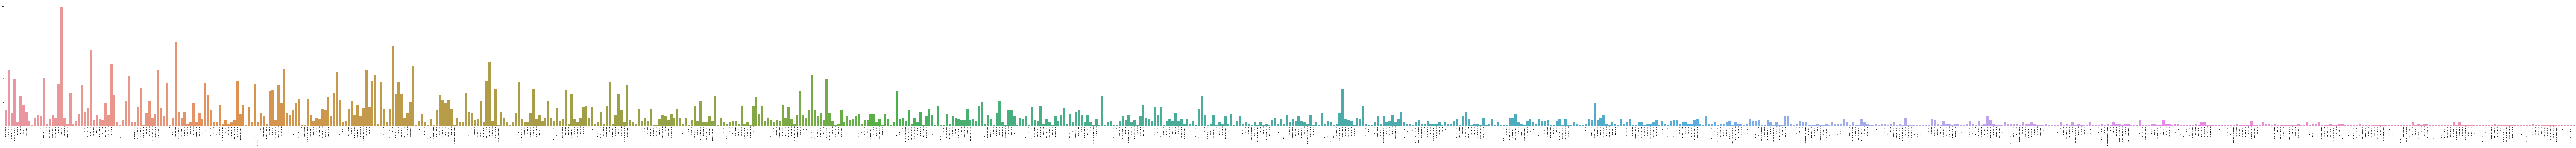

In [17]:
#plotting the count of places
plt.figure(figsize=(500,25))
sns.countplot(x= 'Place',data = docfee)
plt.xticks(rotation = 90)
plt.show()

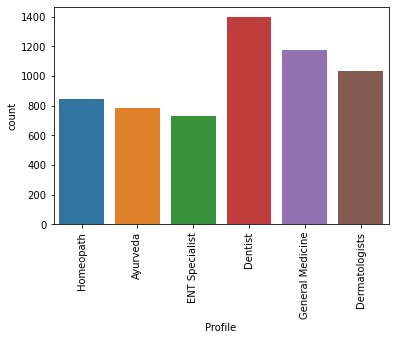

In [18]:
#plot the count of profile
sns.countplot(x= 'Profile',data = docfee)
plt.xticks(rotation = 90)
plt.show()

#the plot shows that dentist profile has maximum count

In [21]:
#lets convert the object type columns in numeric type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
for i in docfee.columns:
    if docfee[i].dtype=="object":
        docfee[i]=le.fit_transform(docfee[i])

In [23]:
docfee.dtypes

Qualification    int32
Experience       int32
Place            int32
Profile          int32
Fees             int64
dtype: object

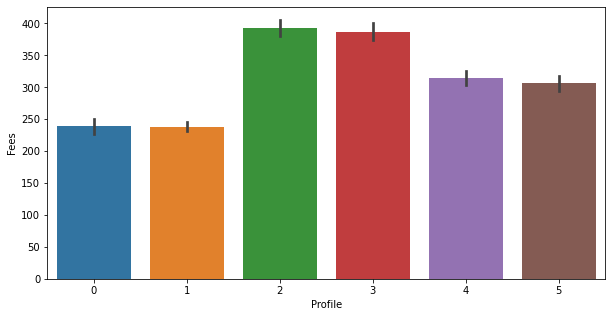

In [24]:
#lets plot profile vs Fees 
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=docfee)
plt.show()

#the plot shows that profile 2 and 3 charges more than other profile.

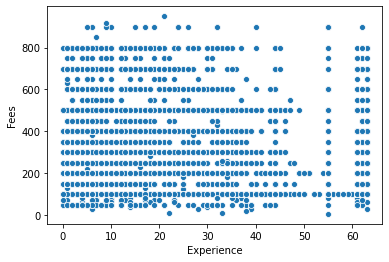

In [25]:
#plot the scatterplot of "Experience" vs "Fees"
sns.scatterplot(x="Experience",y="Fees",data = docfee)
plt.show()

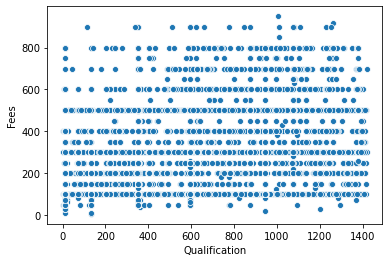

In [26]:
#plot the scatterplot of "qualification" vs "Fees"
sns.scatterplot(x="Qualification",y="Fees",data = docfee)
plt.show()

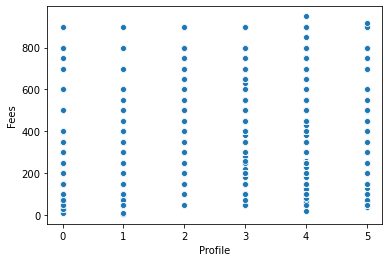

In [35]:
#plot the scatterplot of "Profile" vs "Fees"
sns.scatterplot(x="Profile",y="Fees",data = docfee)
plt.show()

In [27]:
docfee.describe()

,Qualification,Experience,Place,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,414.368059,2.441872,307.944640
std,413.842446,20.937163,258.547684,1.658014,190.920373
min,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,197.000000,1.000000,150.000000
50%,596.000000,15.000000,407.000000,2.000000,300.000000
75%,943.000000,36.000000,628.000000,4.000000,500.000000
max,1419.000000,63.000000,876.000000,5.000000,950.000000


#observations:
#1. there are no missing values.
#2. the mean of all coulmns are more than median of all columns.
#3. there is large differnce in 75% and max values "qualification" and "Place" columns.

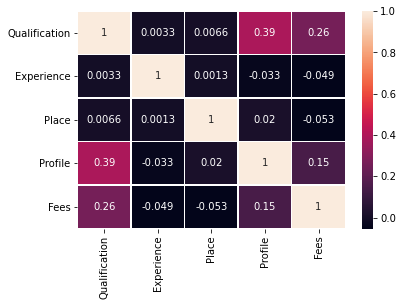

In [28]:
#plot the correlation
dfcorr = docfee.corr()
sns.heatmap(dfcorr,annot = True,linewidths =0.5)
plt.show()

#observations:
#1. there is weak positive correlation between profile and fees columns.
#2. there is positive correlation between qualification and fees columns
#3. there is weak negetive correlation of "experience" and "place" wrt fees columns.

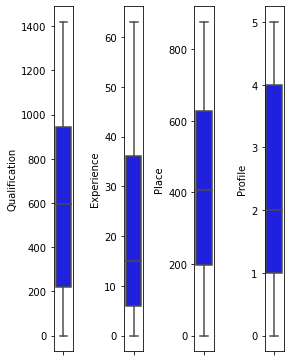

In [31]:
#Plotting Boxplots for outliers
collist = ['Qualification','Experience','Place','Profile']
ncols=10
nrows=10
plt.figure(figsize=(10,5*10))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(docfee[collist[i]],color='blue',orient='v')
    plt.tight_layout()

#from the plot we can say there are no outliers.

In [32]:
#checking the zscore
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(docfee))
threshold = 3
new_docfee = docfee[(z<3).all(axis=1)]

In [33]:
new_docfee.shape

(5941, 5)

In [34]:
p_loss = (20/5961)*100
p_loss

0.33551417547391377

#percentage data loss is very less so we can get rid of outliers

In [ ]:
#plotting the hist plot
for i in ['Qualification','Experience','Place','Profile']:
    plt.hist(docfee[i])
    print(i)
    plt.show()

In [39]:
#skewness of data
docfee.skew()

Qualification    0.239720
Experience      -0.362028
Place            0.124862
Profile          0.108803
Fees             0.751870
dtype: float64

In [37]:
#removing skewness
for i in collist:
    if docfee.skew().loc[i]>0.55:
        docfee[i]=np.log1p(docfee[i])

##### separating x and y variables

In [46]:
x = new_docfee.drop("Fees",axis =1)
y = new_docfee['Fees']

In [47]:
print(x.shape)
print(y.shape)

(5941, 4)
(5941,)


In [48]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

###### finding the best model

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [65]:
#finding the best random state
best_rstate = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 10.594853169840734 found on random state 171


In [67]:
#creating train test split using best random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state =171)

###### Linear Regression

In [68]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(lr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 10.594853169840734, cross_val_score : 6.214549809740708 & differnece : 4.380303360100026


###### Random forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(rf,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 10.26957957503437, cross_val_score : 10.6820071816224 & differnece : -0.4124276065880288


###### Ada Booost Regressor

In [70]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(adb,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 10.393767282323518, cross_val_score : 9.007913745776982 & differnece : 1.385853536546536


###### SGD Regressor

In [71]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(sgd,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 10.536010802238193, cross_val_score : 6.135741792583964 & differnece : 4.400269009654229


#here Linear Regression and SGD regressor are the best model with almost same accuracy score and cv score. 
#we can choose either of them , here we are choosing linear Regressor.

###### Hyper parameter tuning

In [72]:
#create a list of parameters to pass in GridSearchCV
parameters = {"max_iter":[500,700,900,110,1200,1300,1400,1500],
             "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
             "penalty": ["elasticnet","l1","l2"]}

In [73]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(sgd,parameters,cv=5,scoring ='r2')  # intializing GCV
gcv.fit(x_train,y_train)
gcv.best_estimator_   #finding best estimator
gcv_pred = gcv.best_estimator_.predict(x_test)  #predicting th value using best estimator found by GridSearchCV
print("Accuracy score: ", r2_score(y_test,gcv_pred)*100)

Accuracy score:  10.247566487386939


###### serialization

In [74]:
import pickle
filename= 'doctor_fees.pkl'
pickle.dump(gcv.best_estimator_,open(filename,'wb'))

###### Loading the Test data

In [75]:
test_data = pd.read_csv("DoctorFees_Test.csv")
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [76]:
test_data.shape

(1987, 6)

In [77]:
test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [78]:
#we can drop the rating and miscellenous columns as we have done in train dataset
test_data.drop(columns = ["Rating","Miscellaneous_Info"],inplace = True)

In [79]:
test_data.dtypes

Qualification    object
Experience       object
Place            object
Profile          object
dtype: object

In [81]:
#lets check the unique value counts
for i in test_data.columns:
    if test_data[i].dtype == "object" :
        print(test_data[i].value_counts())
        print(" \n ")

BAMS                                                     153
BHMS                                                     150
BDS                                                      144
MBBS                                                     107
MBBS, MD - Dermatology                                    64
                                                        ... 
MBBS, DNB - ENT, Diploma in Otorhinolaryngology (DLO)      1
BHMS, MD - Homeopathy, MBA - Hospital Management           1
BDS, MDS - Prosthodontist And Crown Bridge, FICOI          1
B.Sc, BAMS, MD - Yoga and Rehab                            1
MD - Panchakarma, BAMS                                     1
Name: Qualification, Length: 630, dtype: int64
 
 
10 years experience    110
8 years experience      98
9 years experience      96
19 years experience     92
7 years experience      89
11 years experience     86
13 years experience     83
14 years experience     81
12 years experience     79
17 years experience     72
18 years

In [82]:
#We have to convert "Experience" column to data type int.
#We first need to strip of " years experience" in this column as it is not required.
test_data["Experience"]=test_data["Experience"].str.strip(" years experience")

In [83]:
test_data["Experience"]

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: object

In [84]:
#we have some null values in the "place" column. so we can fill it mode().
test_data['Place'] = test_data['Place'].fillna(test_data['Place'].mode()[0])

In [85]:
#lets convert the object type columns in numeric type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
for i in test_data.columns:
    if test_data[i].dtype=="object":
        test_data[i]=le.fit_transform(test_data[i])

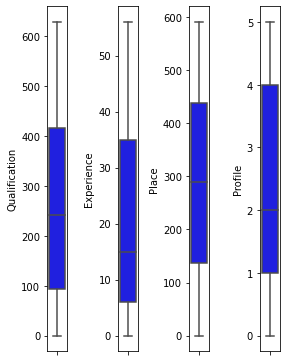

In [88]:
collist = ['Qualification','Experience','Place','Profile']
ncols=10
nrows=10
plt.figure(figsize=(10,5*10))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(test_data[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [90]:
#checking the zscore
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(test_data))
threshold = 3
new_data = test_data[(z<3).all(axis=1)]

In [91]:
new_data.shape

(1987, 4)

In [92]:
test_data.shape

(1987, 4)

In [93]:
test_data.skew()

Qualification    0.280822
Experience       0.687595
Place            0.046487
Profile          0.028926
dtype: float64

In [94]:
#removing skewness
for i in collist:
    if test_data.skew().loc[i]>0.55:
        test_data[i]=np.log1p(test_data[i])

###### Load the model

In [95]:
fitted_model = pickle.load(open('doctor_fees.pkl',"rb"))
fitted_model

SGDRegressor(alpha=0.01, max_iter=1400, penalty='elasticnet')

In [96]:
predictions = fitted_model.predict(test_data)
predictions

array([ 8523.15915234,  8045.91267764,  8481.60699057, ...,
       15005.96300906,  2079.44199161, 11686.51577241])